In [1]:
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.utils import np_utils
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import tree
from tensorflow.keras.preprocessing import sequence
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MekdimTamirat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# loading the dataset

In [2]:
HSD_data = pd.read_csv('C:/Users/MekdimTamirat/Documents/Active Projects/hateSpeechDetectionOnSocailMedia/data_HSD_final.csv')
HSD_data.columns = ['Text', 'Catagory'] # give column names


In [3]:
HSD_data.head()


,Text,Catagory
0,ሰልጣን እስኪያገኝ ተራ የሚጠብቅ,Non-Hate
1,ይሰማል አወኩ አወኩኝ ብለሽ እንደ ቅዱስ ቃሉ ሆንሽ,Non-Hate
2,የኢትዮጵያ ባንዲራ በሌለበት ኢትዮጵያዊነት አይኖርም,Non-Hate
3,እና ምንይሁን ተድያ,Non-Hate
4,የኑረነቢ ማህደር የተባለውን መጽሃፌን አንብበሽ ቢሆን ኖሮ ይህን ጥያቄ ባ...,Non-Hate


In [4]:
HSD_data.tail()

,Text,Catagory
9394,ይህ ቆሻሻ መንግስት ህዝብ አስጨረሰ እባካችሁ ለዚህ የዋህ ሚስኪን ህዝብ/...,hate-speech
9395,ሀሀሀሀሀሀሀሀ አበረ አዳሙ የአንተን በደል ጊዜ ይመልሰው,hate-speech
9396,እስክንድር ጋ ተገናኝ የአአ መሪ እሱ ነው ታኬ ህገወጥ ነው!!,hate-speech
9397,ፎቶ ብቻ ጉራ ብቻ መጀመሪያ የ አ.አ ልጆችን ፍታ,hate-speech
9398,የኦርቶዶክስ እያፈረሱ የሌላን ይገነባሉ ድሮም ሴጣን ቤቱን ለማደስ ይሮጣል...,hate-speech


# displaying with histogram the two node values

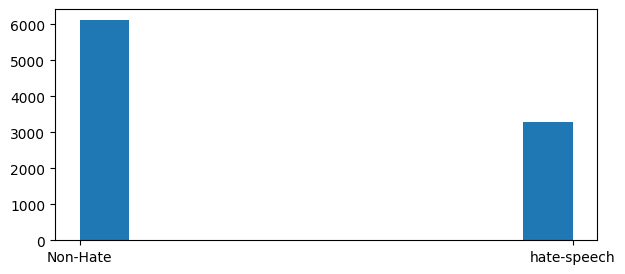

In [5]:
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 3))
ax.hist(HSD_data['Catagory'])
 
# Show plot
plt.show()


# --------  ignoring the fact that the datas are unbalanced !!! ------------

# pre-processing the data


####  step- 1 Removing unnecessary punctuation and characters
####  step -2 Tokenization
####  step -3 Removing stop words 
####  step-4  Normalization
#####  step -5 Stemming
#####  step -6 Lemmatization


### Step -1 

In [6]:
words = HSD_data['Text']
finalWords = []
for word in words:
    
    word = word.strip() # removing the uncessary word whitespaces
    
    #remove any non-alphanumeric character
    word = re.sub(r'\W', ' ', str(word))
    
    #remove any digit
    word = re.sub("(\\d)+"," ",word)
    
    #remove punctuation 
    word = re.sub(",#'!:;"," ",word)
    
    #remove any latin characters 
    word = re.sub(r'[a-zA-Z]+', '', word)

    word = re.sub('\s+', ' ', word)  # remove extra whitespace
    finalWords.append(word)



###  step -2 

In [7]:

tokenizedList = []
for lineWord in finalWords:
    separatedWords = lineWord.split(' ')
    word = [word for word in separatedWords if   word.strip() != '']
    tokenizedList.append(word)
    

### step -3

In [8]:
# list amharic stop words
stopwords=['ነው', 'እና', 'እኔ', 'የእኔ','እኔ','ራሴ','እኛ','የእኛ','እኛ','ራሳችን','አንቺ' ,'የእርስዎ' ,'እራስዎ','እራሳችሁን','የእሱ',
           'እሱ','እ','ራሱ','እሷ' 'ራሷን','እሱ','በራሱ','እነሱ','የእነሱ','እራሳቸው','ምንድን','የት','ማን','ይሄ','ያንን','እነዚህ','እነዚያ'
           ,'ነው','እነዚህ','ናቸው','ነበር','ነበሩ','መሆን','ሆኗል','መሆን','አለ','ነበሩ','አለው','መስራት','ያደርገዋል','አደረጉት',
           'ማድረግ','እና','ግን','ከሆነ','ወይም','ምክንያቱም','እንደ','እስከ','ገና','የ','ለ','ከ','ጋር','ስለ','መካከል','ውስጥ',
           'ከዚህ','በፊት','በኋላ','ከላይ','ከታች','ወደ','ከ','ወደ','ላይ','ታች','ውስጥ','ውጭ','በላይ','በታች','በድጋሚ','እናስ','እናም']

           
cleanedWordsList= []
for lineWords in tokenizedList:
    tempList = []
    for word in lineWords:
        if word not in stopwords:
            tempList.append(word)
    cleanedWordsList.append(tempList)
    
        

### Step -4 

In [9]:
# for the time being this is fine but convert it to something good but not this at all

normalizedSenteces = []
for linesWords in cleanedWordsList:
    tempList = []
    for word in linesWords:
        
        word = re.sub("ሐ","ሀ",word)
        word = re.sub("ሑ","ሁ",word)
        word = re.sub("ሒ","ሂ",word)
        word = re.sub("ሓ","ሃ",word)
        word = re.sub("ሔ","ሄ",word)
        word = re.sub("ሕ","ህ",word)
        word = re.sub("ሖ","ሆ",word)
        
        word = re.sub("ኀ","ሀ",word)
        word = re.sub("ኁ","ሁ",word)
        word = re.sub("ኂ","ሂ",word)
        word = re.sub("ኃ","ሃ",word)
        word = re.sub("ኄ","ሄ",word)
        word = re.sub("ኅ","ህ",word)
        word = re.sub("ኆ","ሆ",word)
        
        word = re.sub("ሠ","ሰ",word)
        word = re.sub("ሡ","ሱ",word)
        word = re.sub("ሢ","ሲ",word)
        word = re.sub("ሣ","ሳ",word)
        word = re.sub("ሤ","ሴ",word)
        word = re.sub("ሥ","ስ",word)
        word = re.sub("ሦ","ሶ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ጸ","ፀ",word)
        word = re.sub("ጹ","ፁ",word)
        word = re.sub("ጺ","ፂ",word)
        word = re.sub("ጻ","ፃ",word)
        word = re.sub("ጼ","ፄ",word)
        word = re.sub("ጽ","ፅ",word)
        word = re.sub("ጾ","ፆ",word)
        
        tempList.append(word)
    normalizedSenteces.append(tempList)
        
        
       
       
            
            
            

        

In [16]:
 HSD_data['Catagory'] = HSD_data.Catagory.map({'Non-Hate':1,'hate-speech':0})
    

---- converting the dataset to vectors

## Feuture Extraction methods used

#### 1- Tf Idf
#### 2- N-grams



In [17]:
# # Split into training and testing data
x = HSD_data['Text']
y = HSD_data['Catagory']

In [18]:
import pandas as pd


normalizedSenteces  = pd.Series(normalizedSenteces)

finalSentences = []
for lists in normalizedSenteces:
    temp = ""
    for word in lists:
        temp =  temp +" "+word
    finalSentences.append(temp)

    
x = pd.Series(finalSentences)

## TF- IDF vectorizer


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer



vectorizer = TfidfVectorizer(
  use_idf=True,
  smooth_idf = False,
  decode_error = 'replace',
  min_df = 3,
  max_df = 0.75  
)


vect_fit = vectorizer.fit(x)
x_train_transform_vect = vect_fit.transform(x)


### spliting the data to training and test data


In [20]:
# Split into training and testing data after vectorizing for testing purpose
x_train, x_test, y_train, y_test = train_test_split(x_train_transform_vect,y,  test_size=0.2, random_state=42)


### TF-IDF WITH NAIVE BAYES


In [21]:
model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)


MultinomialNB()

#### predicting the and getting necessary accurracy -- NB


In [22]:
# prediction 
predicted = model_NB.predict(x_test)

# Score
nb_score = model_NB.score(x_test, y_test)


accuracy_score =metrics.accuracy_score(y_test, predicted)
confusion_matric = metrics.confusion_matrix(y_test, predicted)
classification_score = metrics.classification_report(y_test, predicted)
precission_score = metrics.precision_score(y_test, predicted)
recall_score = metrics.recall_score(y_test, predicted)



In [23]:
print(nb_score)
print(accuracy_score)
print(confusion_matric)
print(classification_score)
print(precission_score)
print(recall_score)
print()

0.8590425531914894
0.8590425531914894
[[ 448  220]
 [  45 1167]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       668
           1       0.84      0.96      0.90      1212

    accuracy                           0.86      1880
   macro avg       0.88      0.82      0.83      1880
weighted avg       0.87      0.86      0.85      1880

0.8413842826243692
0.9628712871287128



Text(50.722222222222214, 0.5, 'y_pred')

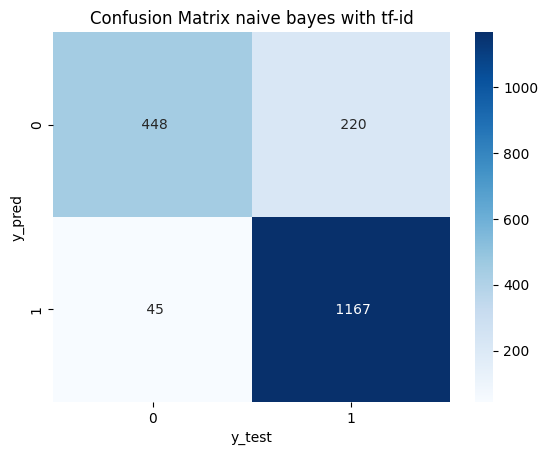

In [24]:
cm=confusion_matrix(y_test,predicted)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix naive bayes with tf-id')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

## TF-IDF With SVM

In [33]:
# Perform classification with SVM, kernel=rbf
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train, y_train)


SVC()

In [34]:


# prediction 
predicted_svm = SVM.predict(x_test)

# Score
SVM_score = SVM.score(x_test, y_test)



accuracy_score_svm =metrics.accuracy_score(y_test, predicted_svm)
confusion_matric_svm = metrics.confusion_matrix(y_test, predicted_svm)
classification_score_svm = metrics.classification_report(y_test, predicted_svm)
precission_score_svm = metrics.precision_score(y_test, predicted_svm)
recall_score_svm = metrics.recall_score(y_test, predicted_svm)


In [35]:
print(SVM_score)
print(accuracy_score_svm)
print(confusion_matric_svm)
print(classification_score_svm)
print(precission_score_svm)
print(recall_score_svm)


0.8606382978723405
0.8606382978723405
[[ 433  235]
 [  27 1185]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       668
           1       0.83      0.98      0.90      1212

    accuracy                           0.86      1880
   macro avg       0.89      0.81      0.83      1880
weighted avg       0.87      0.86      0.85      1880

0.8345070422535211
0.9777227722772277


Text(50.722222222222214, 0.5, 'y_pred')

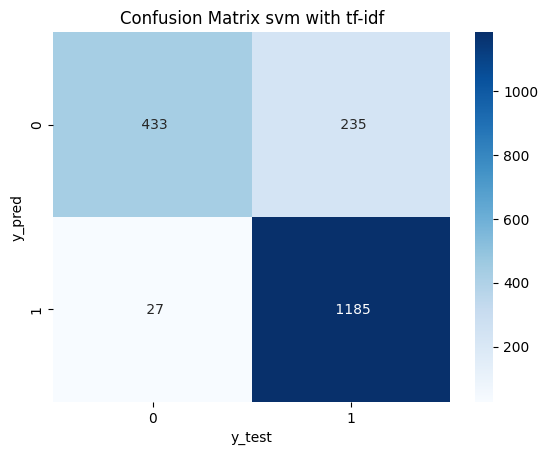

In [36]:
cm_svm=confusion_matrix(y_test,predicted_svm)
ax_svm=sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt=' ')
ax_svm.set_title('Confusion Matrix svm with tf-idf')
ax_svm.set_xlabel('y_test')
ax_svm.set_ylabel('y_pred')

## TF-IDF RandomForestClassifier

In [37]:
# creating a RF classifier
RandomForest = RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
RandomForest = RandomForest.fit(x_train, y_train)



In [38]:

# prediction 
predicted_rf = RandomForest.predict(x_test)

# Score
RF_score_rf = RandomForest.score(x_test, y_test)

accuracy_score_rf=metrics.accuracy_score(y_test, predicted_rf)
confusion_matric_rf = metrics.confusion_matrix(y_test, predicted_rf)
classification_score_rf = metrics.classification_report(y_test, predicted_rf)
precission_score_rf = metrics.precision_score(y_test, predicted_rf)
recall_score_rf= metrics.recall_score(y_test, predicted_rf)

In [39]:
print(RF_score_rf)
print(accuracy_score_rf)
print(confusion_matric_rf)
print(classification_score_rf)
print(precission_score_rf)
print(recall_score_rf)

0.8659574468085106
0.8659574468085106
[[ 478  190]
 [  62 1150]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       668
           1       0.86      0.95      0.90      1212

    accuracy                           0.87      1880
   macro avg       0.87      0.83      0.85      1880
weighted avg       0.87      0.87      0.86      1880

0.8582089552238806
0.9488448844884488


Text(50.722222222222214, 0.5, 'y_pred')

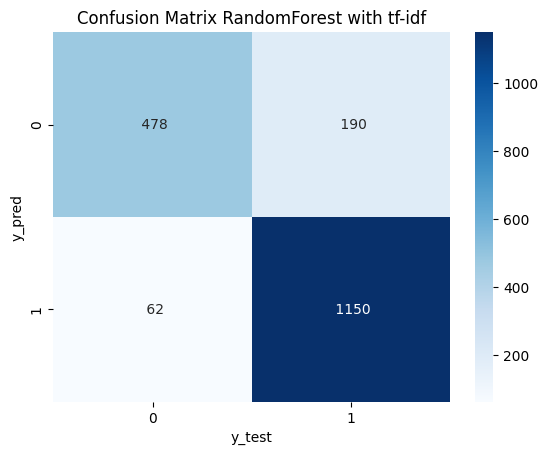

In [41]:
cm_rf=confusion_matrix(y_test,predicted_rf)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with tf-idf')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')